In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve
from sklearn.metrics import accuracy_score

In [4]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('breast-cancer.csv')
df.head()

Saving breast-cancer.csv to breast-cancer.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
print("Missing values:", df.isnull().sum())
df = df.dropna()

Missing values: id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
#Encode target variable
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  #'M'-1, 'B'-0

#Show class distribution
print("Class distribution:")
print(df['diagnosis'].value_counts())

#Define features and target
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Class distribution:
diagnosis
0    357
1    212
Name: count, dtype: int64


In [7]:
#Use Random Forest Classifier
model = RandomForestClassifier(random_state=42)

In [8]:
#K-Fold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=kf)

print("Cross-validation scores:", scores)
print("Average accuracy:", np.mean(scores))

Cross-validation scores: [0.96491228 0.96491228 0.93859649 0.96491228 0.96460177]
Average accuracy: 0.9595870206489675


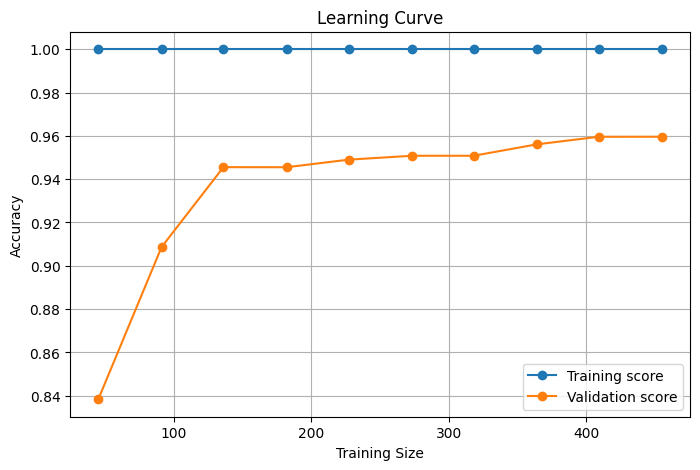

In [9]:
#create learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_scaled, y, cv=kf, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

#mean scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

#plot
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', label='Validation score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [10]:
if train_mean[-1] > test_mean[-1] + 0.05:
    print("Model shows signs of overfitting.")
elif test_mean[-1] > train_mean[-1] + 0.05:
    print("Model shows signs of underfitting.")
else:
    print("Model seems to be well-balanced.")

Model seems to be well-balanced.


**Observations:**
- The learning curve helps visualize how well the model generalizes.
- The training and validation accuracy are both high and close, showing a well-fitted model.
- Cross-validation confirms that the model is consistent across different splits.
